In [24]:
from fhd import *
from matplotlib import pyplot as plt
import numpy as np

In [25]:
import matplotlib as mpl
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['axes.labelcolor'] = 'gray'

In [26]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# helper functions
def load_fhd_for_fft(f_name):
    fhd_content = load(f_name)
    data = np.squeeze(fhd_content['channel_{}_voltage'.format(0)].T)
    if data.size % 2 != 0:
        data = data[0:-1]
    return data

    


In [38]:
# f_name = '/mnt/data/temp/2018_10_24/standalone_ephys_170439.fhd'
# f_name = '/mnt/data/temp/2018_10_24/standalone_ephys_171141.fhd'
# f_name = '/mnt/data/temp/2018_10_24/standalone_ephys_171906.fhd'

f_name = '/mnt/data/temp/2018_10_25/standalone_ephys_170920.fhd'
info = 'with mpm'

fhd_content = load(f_name)

Fs = 15000.0
dt = 1.0/(Fs)

fig_size = (15,5)

import scipy.signal
import scipy.fftpack


data = np.squeeze(fhd_content['channel_{}_voltage'.format(0)].T)
if data.size % 2 != 0:
    data = data[0:-1]


# plt.figure(figsize=(20,5))

# plt.plot(np.arange(0, data.size)*dt, butter_bandpass_filter(data, 300.0, 3000.0, Fs))
# plt.title('pVoltage signal channel 1, {}: {}'.format(info, f_name))
# plt.xlabel('Time (s)')
# plt.ylabel('uV')



In [47]:
## without mu metal, with shield

data_with_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_170920.fhd')
data_without_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_171025.fhd')
from scipy.io import savemat
savemat('without_mpm.mat', {'data_without_mpm': data_without_mpm})

<IPython.core.display.Javascript object>


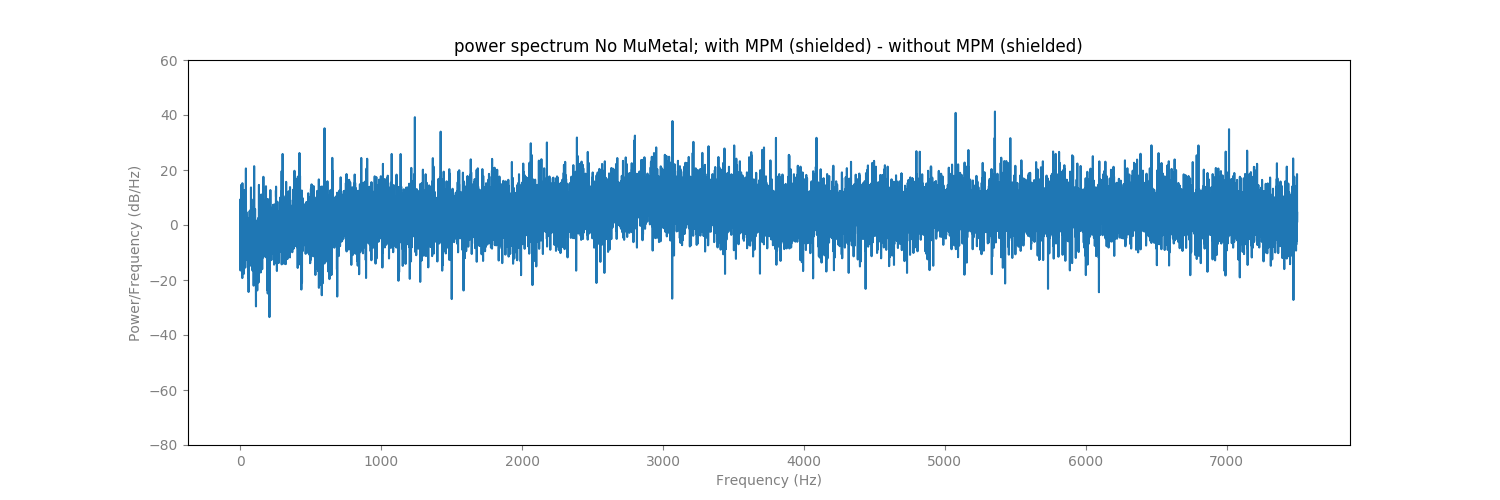

<IPython.core.display.Javascript object>


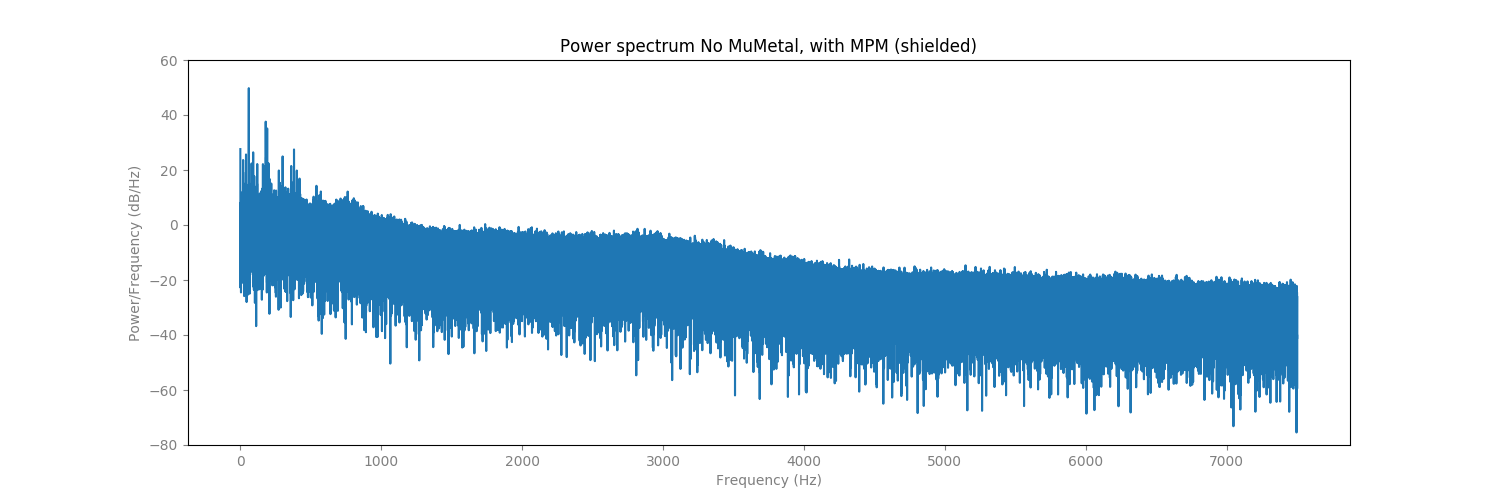

<IPython.core.display.Javascript object>


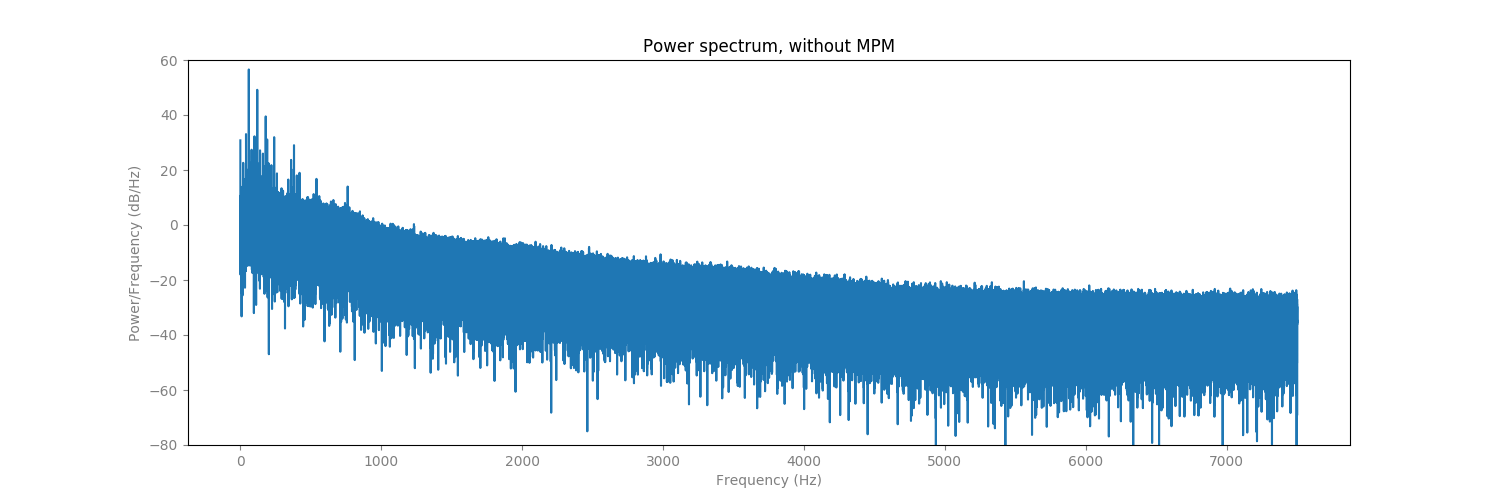

In [41]:
## without mu metal, with shield

data_with_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_170920.fhd')
data_without_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_171025.fhd')

xf_w, yf_w = fft_spectrum(data_with_mpm, Fs)
xf_wo, yf_wo = fft_spectrum(data_without_mpm, Fs)



xq = np.arange(0, Fs/2, 0.5)


yf_w_interp = np.interp(xq, xf_w, yf_w)
yf_wo_interp = np.interp(xq, xf_wo, yf_wo)


plt.figure(figsize = fig_size)
plt.plot(xq, yf_w_interp - yf_wo_interp)
plt.title('power spectrum No MuMetal; with MPM (shielded) - without MPM (shielded)')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))



plt.figure(figsize = fig_size)
plt.plot(xf_w, yf_w)
plt.title('Power spectrum No MuMetal, with MPM (shielded)')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('no-mu-w-mpm-shielded.png')

plt.figure(figsize = fig_size)
plt.plot(xf_wo, yf_wo)
plt.title('Power spectrum No MuMetal, without MPM')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('no-mu-no-mpm.png')

# x_id = closest_argmin(xf_w, xf_wo)


# plt.figure(figsize=(20,10))
# plt.plot(xf_w, yf_w - yf_wo[x_id])
# plt.title('power spectrum (with - without)')
# plt.xlabel('Frequency (Hz)');
# plt.ylabel('Power/Frequency (dB/Hz)');
# plt.ylim((-80,60))




<IPython.core.display.Javascript object>


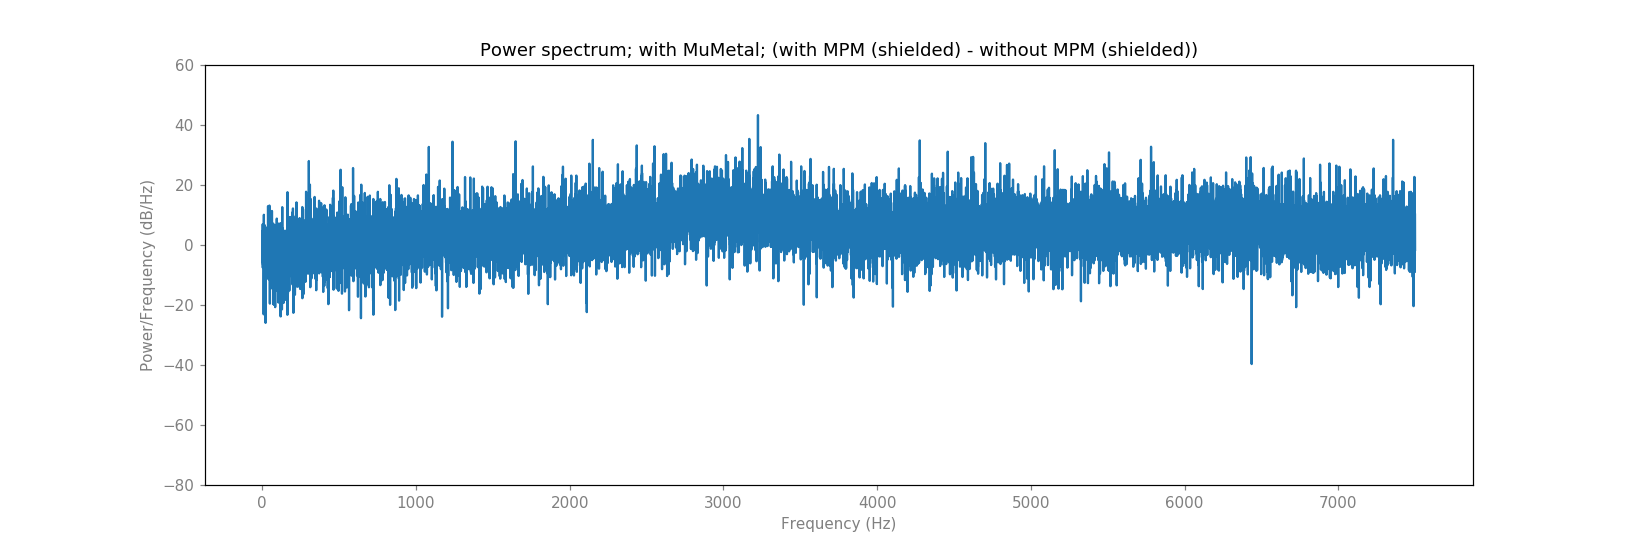

<IPython.core.display.Javascript object>


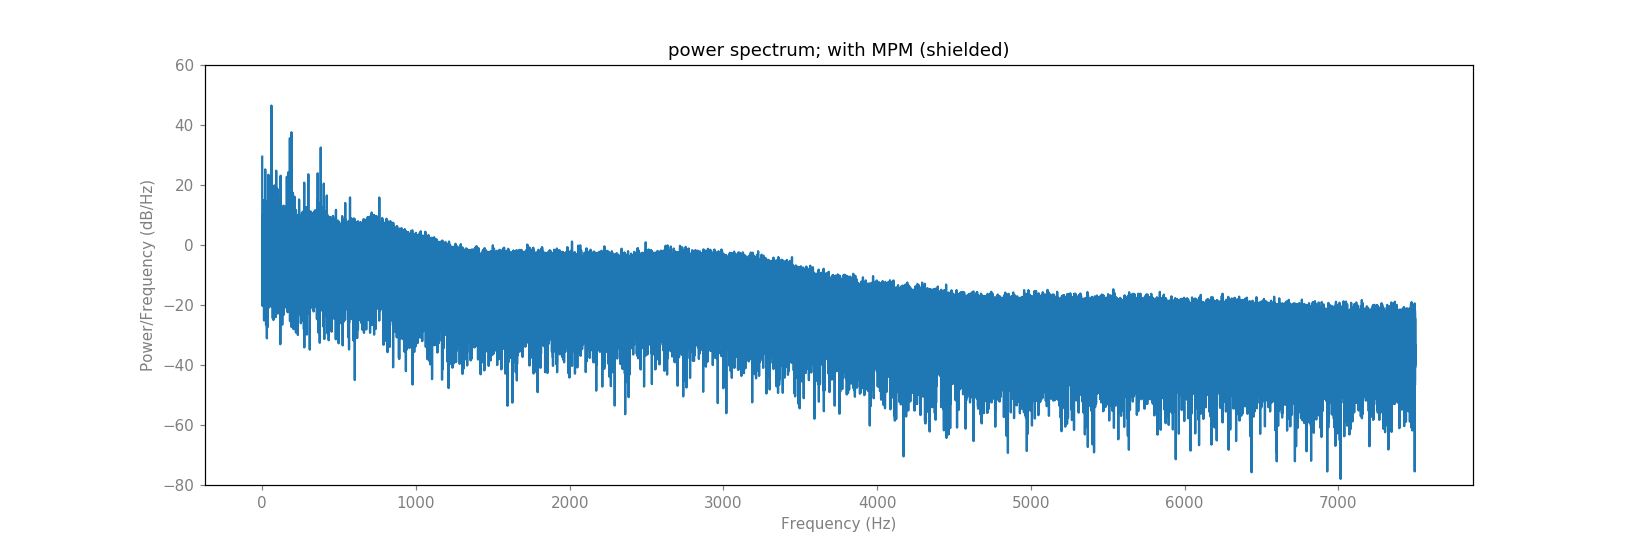

<IPython.core.display.Javascript object>


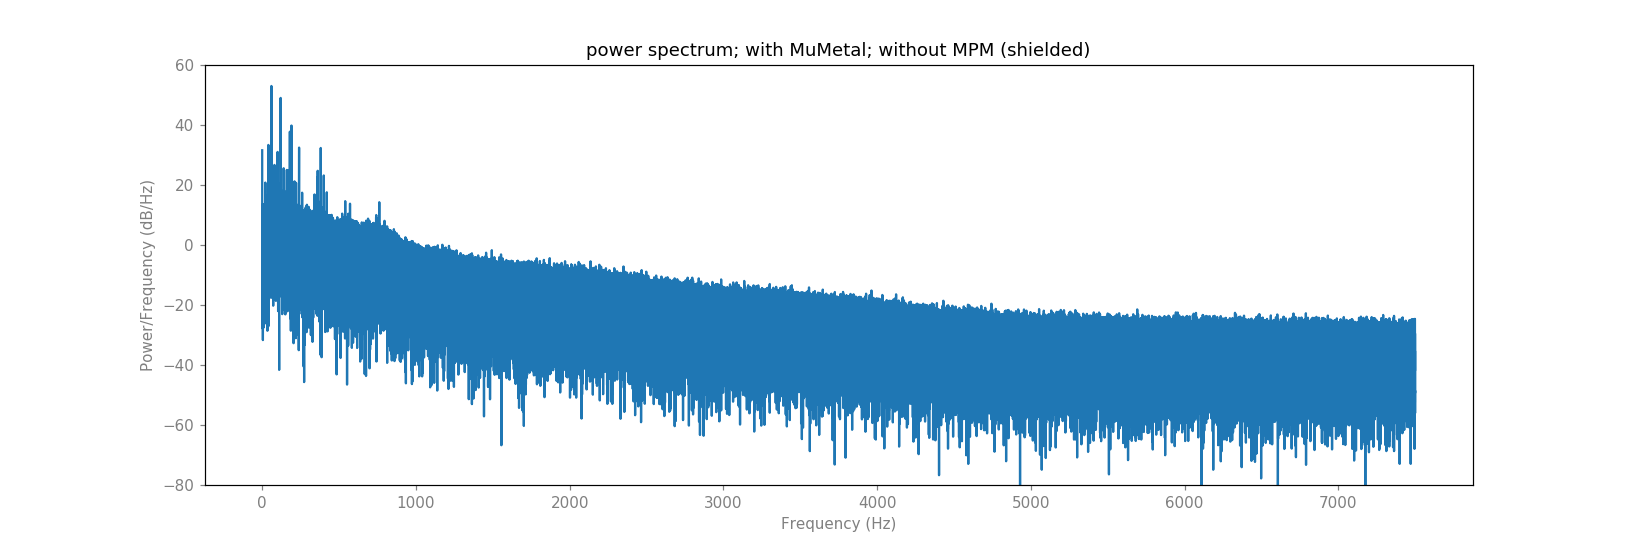

In [48]:
## with mu metal, with shield

data_with_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_170741.fhd')
data_without_mpm = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_170603.fhd')

from scipy.io import savemat
savemat('with_mpm.mat', {'data_with_mpm_shielded': data_with_mpm})

xf_w, yf_w = fft_spectrum(data_with_mpm, Fs)
xf_wo, yf_wo = fft_spectrum(data_without_mpm, Fs)



xq = np.arange(0, Fs/2, 0.5)


yf_w_interp = np.interp(xq, xf_w, yf_w)
yf_wo_interp = np.interp(xq, xf_wo, yf_wo)


plt.figure(figsize = fig_size)
plt.plot(xq, yf_w_interp - yf_wo_interp)
plt.title('Power spectrum; with MuMetal; (with MPM (shielded) - without MPM (shielded))')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))



plt.figure(figsize = fig_size)
plt.plot(xf_w, yf_w)
plt.title('power spectrum; with MPM (shielded)')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('w-mu-w-mpm-shielded.png')


plt.figure(figsize = fig_size)
plt.plot(xf_wo, yf_wo)
plt.title('power spectrum; with MuMetal; without MPM (shielded)')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('w-mu-no-mpm.png')

<IPython.core.display.Javascript object>


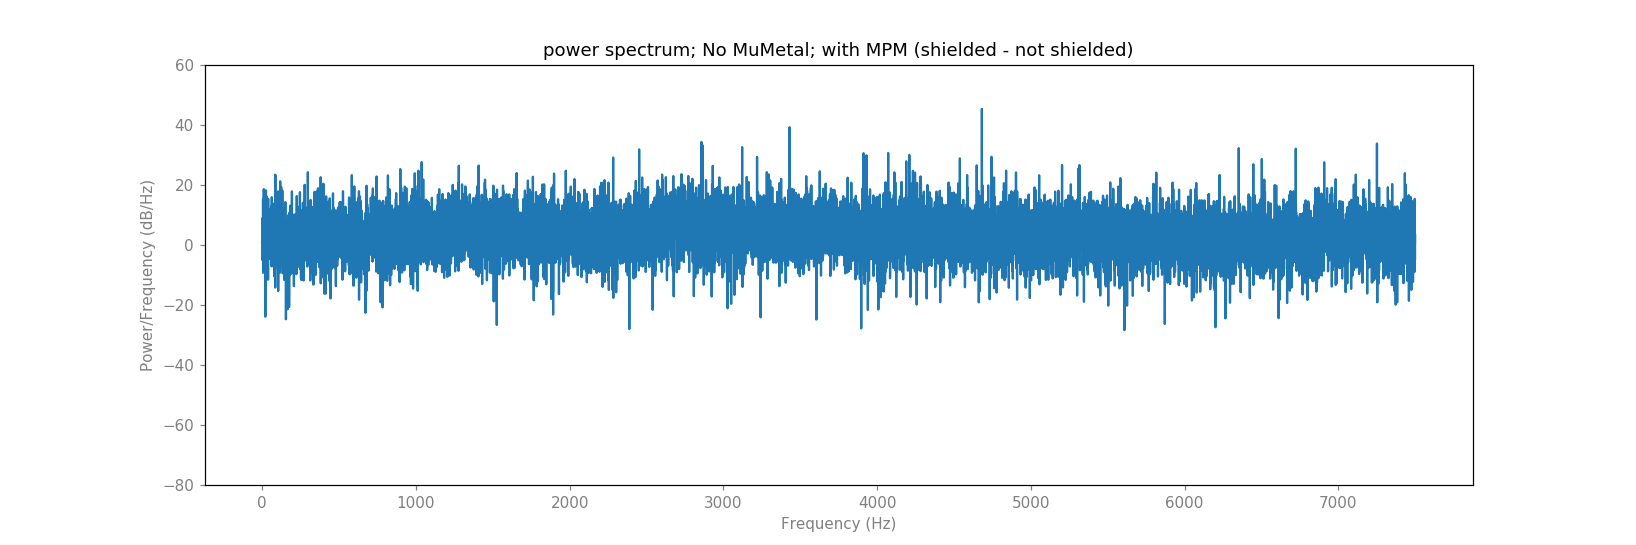

<IPython.core.display.Javascript object>


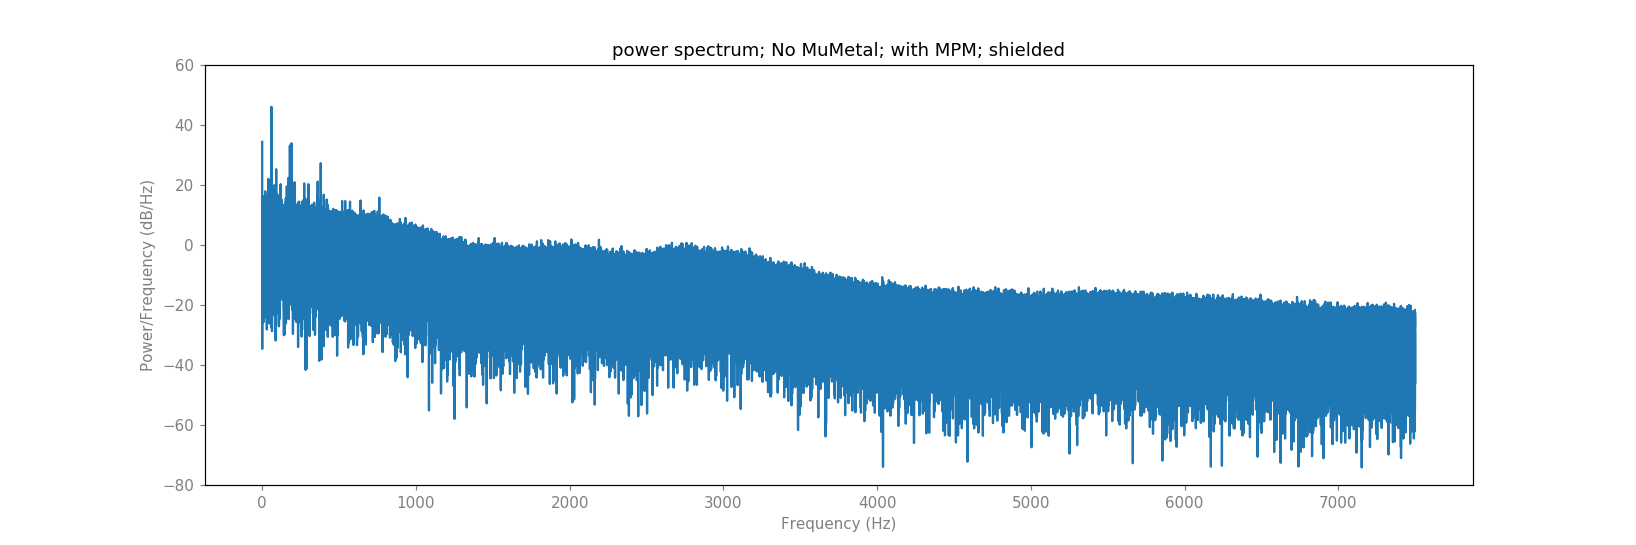

<IPython.core.display.Javascript object>


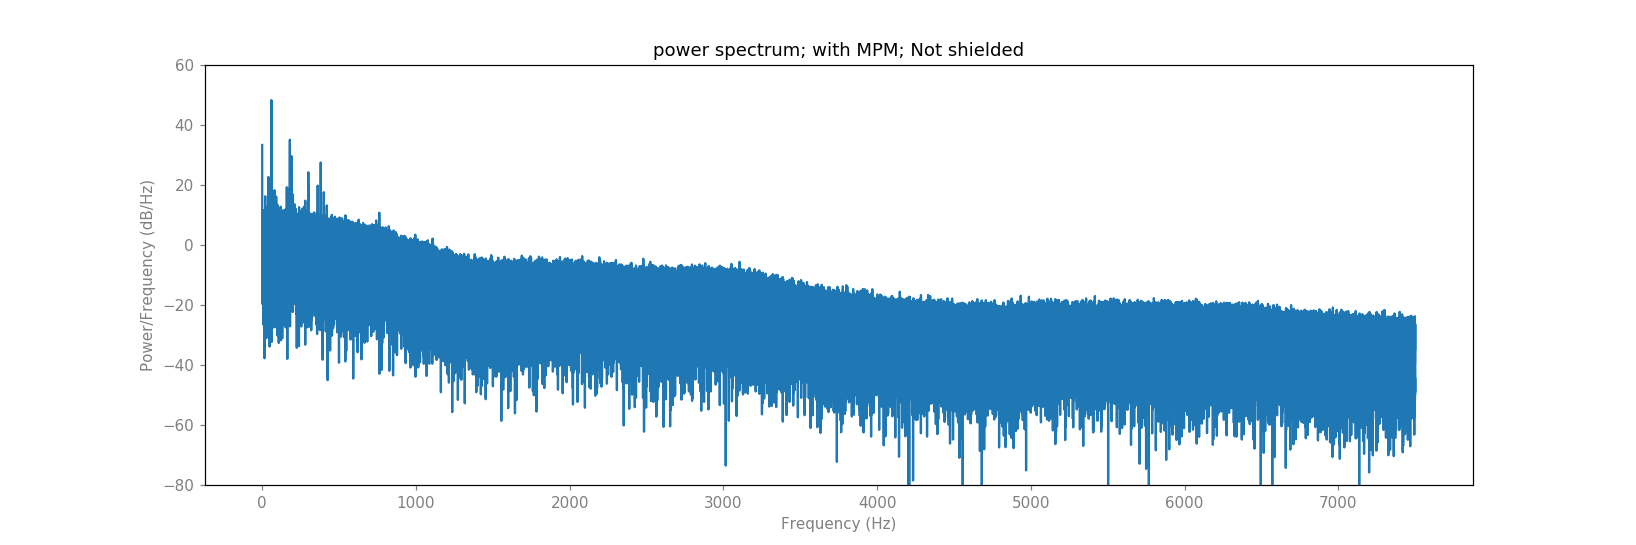

In [49]:
## without mu metal, with mpm

data_with_shield = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_173216.fhd')
data_without_shield = load_fhd_for_fft('/mnt/data/temp/2018_10_25/standalone_ephys_173401.fhd')

xf_w, yf_w = fft_spectrum(data_with_shield, Fs)
xf_wo, yf_wo = fft_spectrum(data_without_shield, Fs)

from scipy.io import savemat
savemat('with_mpm_not_shielded.mat', {'data_without_mpm_not_shielded': data_without_shield})

xq = np.arange(0, Fs/2, 0.5)


yf_w_interp = np.interp(xq, xf_w, yf_w)
yf_wo_interp = np.interp(xq, xf_wo, yf_wo)


plt.figure(figsize = fig_size)
plt.plot(xq, yf_w_interp - yf_wo_interp)
plt.title('power spectrum; No MuMetal; with MPM (shielded - not shielded)')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))



plt.figure(figsize = fig_size)
plt.plot(xf_w, yf_w)
plt.title('power spectrum; No MuMetal; with MPM; shielded')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('no-mu-w-mpm-shielded-2.png')

plt.figure(figsize = fig_size)
plt.plot(xf_wo, yf_wo)
plt.title('power spectrum; with MPM; Not shielded')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))
plt.savefig('no-mu-w-mpm-not-shielded-2.png')


In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

# time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, dt)
idx = np.argsort(freqs)
plt.figure()
plt.plot(freqs[idx], ps[idx])

In [ ]:
import scipy.signal
import scipy.fftpack

f, axes = plt.subplots(4, 2, gridspec_kw = {'width_ratios':[2, 1]})
f.set_size_inches(13,10)
for i in range(4):
    data = fhd_content['channel_{}_voltage'.format(i)].T
    axes[i][0].plot(np.arange(0, data.size)*dt, data)

    yf = scipy.fftpack.fft(data)
    N = data.size
    xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
    power_spectrum = 2.0/N * np.abs(yf[:N//2])    
    axes[i][1].plot(xf, power_spectrum)

# for i in range(4):
#     axes[4 + i].plot(fhd_content['channel_{}'.format(i)].T)    
    
# plt.plot(fhd_content['channel_0'].T)

In [ ]:
for i,key in enumerate(fhd_content.keys()):
    print('------{}--------'.format(i))
    print(key)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(sss.aligned_spikes - np.mean(sss.aligned_spikes, axis=0))

x_pca = pca.transform(sss.aligned_spikes)